In [11]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('flights_filtered.csv', delimiter=',')

C:\Users\trist\AppData\Local\Temp\ipykernel_14296\625555429.py:1: DtypeWarning: Columns (20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flights_filtered.csv', delimiter=',')


In [13]:
display(df.head())

,TAIL_NUMBER,SCHEDULED_DEPARTURE,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,...,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,airport_org_AIRPORT,airport_org_CITY,airport_org_COUNTRY,airport_des_AIRPORT,airport_des_CITY,airport_des_COUNTRY,AIRLINE_name,Date
0,N407AS,NaN,4,98,23:54:00,-11.0,20:05:00,169.0,1448,430,...,NaN,NaN,Ted Stevens Anchorage International Airport,Anchorage,USA,Seattle-Tacoma International Airport,Seattle,USA,Alaska Airlines Inc.,2015-01-01
1,N3KUAA,01:00:00,4,2336,NaN,-8.0,NaN,263.0,2330,750,...,NaN,NaN,Los Angeles International Airport,Los Angeles,USA,Palm Beach International Airport,West Palm Beach,USA,American Airlines Inc.,2015-01-01
2,N171US,02:00:00,4,840,01:08:00,-2.0,NaN,266.0,2296,806,...,NaN,NaN,San Francisco International Airport,San Francisco,USA,Charlotte Douglas International Airport,Charlotte,USA,US Airways Inc.,2015-01-01
3,N3HYAA,02:00:00,4,258,01:05:00,-5.0,NaN,258.0,2342,805,...,NaN,NaN,Los Angeles International Airport,Los Angeles,USA,Miami International Airport,Miami,USA,American Airlines Inc.,2015-01-01
4,N527AS,02:05:00,4,135,02:04:00,-1.0,23:05:00,199.0,1448,320,...,NaN,NaN,Seattle-Tacoma International Airport,Seattle,USA,Ted Stevens Anchorage International Airport,Anchorage,USA,Alaska Airlines Inc.,2015-01-01


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TAIL_NUMBER          object 
 1   SCHEDULED_DEPARTURE  object 
 2   DAY_OF_WEEK          int64  
 3   FLIGHT_NUMBER        int64  
 4   DEPARTURE_TIME       object 
 5   DEPARTURE_DELAY      float64
 6   SCHEDULED_TIME       object 
 7   AIR_TIME             float64
 8   DISTANCE             int64  
 9   SCHEDULED_ARRIVAL    int64  
 10  ARRIVAL_TIME         float64
 11  ARRIVAL_DELAY        float64
 12  DIVERTED             int64  
 13  CANCELLED            int64  
 14  CANCELLATION_REASON  object 
 15  AIR_SYSTEM_DELAY     float64
 16  SECURITY_DELAY       float64
 17  AIRLINE_DELAY        float64
 18  LATE_AIRCRAFT_DELAY  float64
 19  WEATHER_DELAY        float64
 20  airport_org_AIRPORT  object 
 21  airport_org_CITY     object 
 22  airport_org_COUNTRY  object 
 23  airport_des_AIRPORT  object 
 24

In [70]:
import datetime

# Assuming your original dataframe is called `df`
df['Month'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%B'))

In [79]:
df.head()

,TAIL_NUMBER,SCHEDULED_DEPARTURE,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,...,WEATHER_DELAY,airport_org_AIRPORT,airport_org_CITY,airport_org_COUNTRY,airport_des_AIRPORT,airport_des_CITY,airport_des_COUNTRY,AIRLINE_name,Date,Month
0,N407AS,NaN,4,98,23:54:00,-11.0,20:05:00,169.0,1448,430,...,NaN,Ted Stevens Anchorage International Airport,Anchorage,USA,Seattle-Tacoma International Airport,Seattle,USA,Alaska Airlines Inc.,2015-01-01,January
1,N3KUAA,01:00:00,4,2336,NaN,-8.0,NaN,263.0,2330,750,...,NaN,Los Angeles International Airport,Los Angeles,USA,Palm Beach International Airport,West Palm Beach,USA,American Airlines Inc.,2015-01-01,January
2,N171US,02:00:00,4,840,01:08:00,-2.0,NaN,266.0,2296,806,...,NaN,San Francisco International Airport,San Francisco,USA,Charlotte Douglas International Airport,Charlotte,USA,US Airways Inc.,2015-01-01,January
3,N3HYAA,02:00:00,4,258,01:05:00,-5.0,NaN,258.0,2342,805,...,NaN,Los Angeles International Airport,Los Angeles,USA,Miami International Airport,Miami,USA,American Airlines Inc.,2015-01-01,January
4,N527AS,02:05:00,4,135,02:04:00,-1.0,23:05:00,199.0,1448,320,...,NaN,Seattle-Tacoma International Airport,Seattle,USA,Ted Stevens Anchorage International Airport,Anchorage,USA,Alaska Airlines Inc.,2015-01-01,January


In [101]:
df['delay'] = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].notnull().any(axis=1)


In [102]:
df.head()

,TAIL_NUMBER,SCHEDULED_DEPARTURE,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,...,airport_org_AIRPORT,airport_org_CITY,airport_org_COUNTRY,airport_des_AIRPORT,airport_des_CITY,airport_des_COUNTRY,AIRLINE_name,Date,Month,delay
0,N407AS,NaN,4,98,23:54:00,-11.0,20:05:00,169.0,1448,430,...,Ted Stevens Anchorage International Airport,Anchorage,USA,Seattle-Tacoma International Airport,Seattle,USA,Alaska Airlines Inc.,2015-01-01,January,False
1,N3KUAA,01:00:00,4,2336,NaN,-8.0,NaN,263.0,2330,750,...,Los Angeles International Airport,Los Angeles,USA,Palm Beach International Airport,West Palm Beach,USA,American Airlines Inc.,2015-01-01,January,False
2,N171US,02:00:00,4,840,01:08:00,-2.0,NaN,266.0,2296,806,...,San Francisco International Airport,San Francisco,USA,Charlotte Douglas International Airport,Charlotte,USA,US Airways Inc.,2015-01-01,January,False
3,N3HYAA,02:00:00,4,258,01:05:00,-5.0,NaN,258.0,2342,805,...,Los Angeles International Airport,Los Angeles,USA,Miami International Airport,Miami,USA,American Airlines Inc.,2015-01-01,January,False
4,N527AS,02:05:00,4,135,02:04:00,-1.0,23:05:00,199.0,1448,320,...,Seattle-Tacoma International Airport,Seattle,USA,Ted Stevens Anchorage International Airport,Anchorage,USA,Alaska Airlines Inc.,2015-01-01,January,False


In [ ]:
import matplotlib.patches as mpatches

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(delay) to find y position of the bars
total = df.groupby('Month')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'January')
bar1 = sns.barplot(x="Month",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'February')
bar2 = sns.barplot(x="Month", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue')
bottom_bar = mpatches.Patch(color='lightblue')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

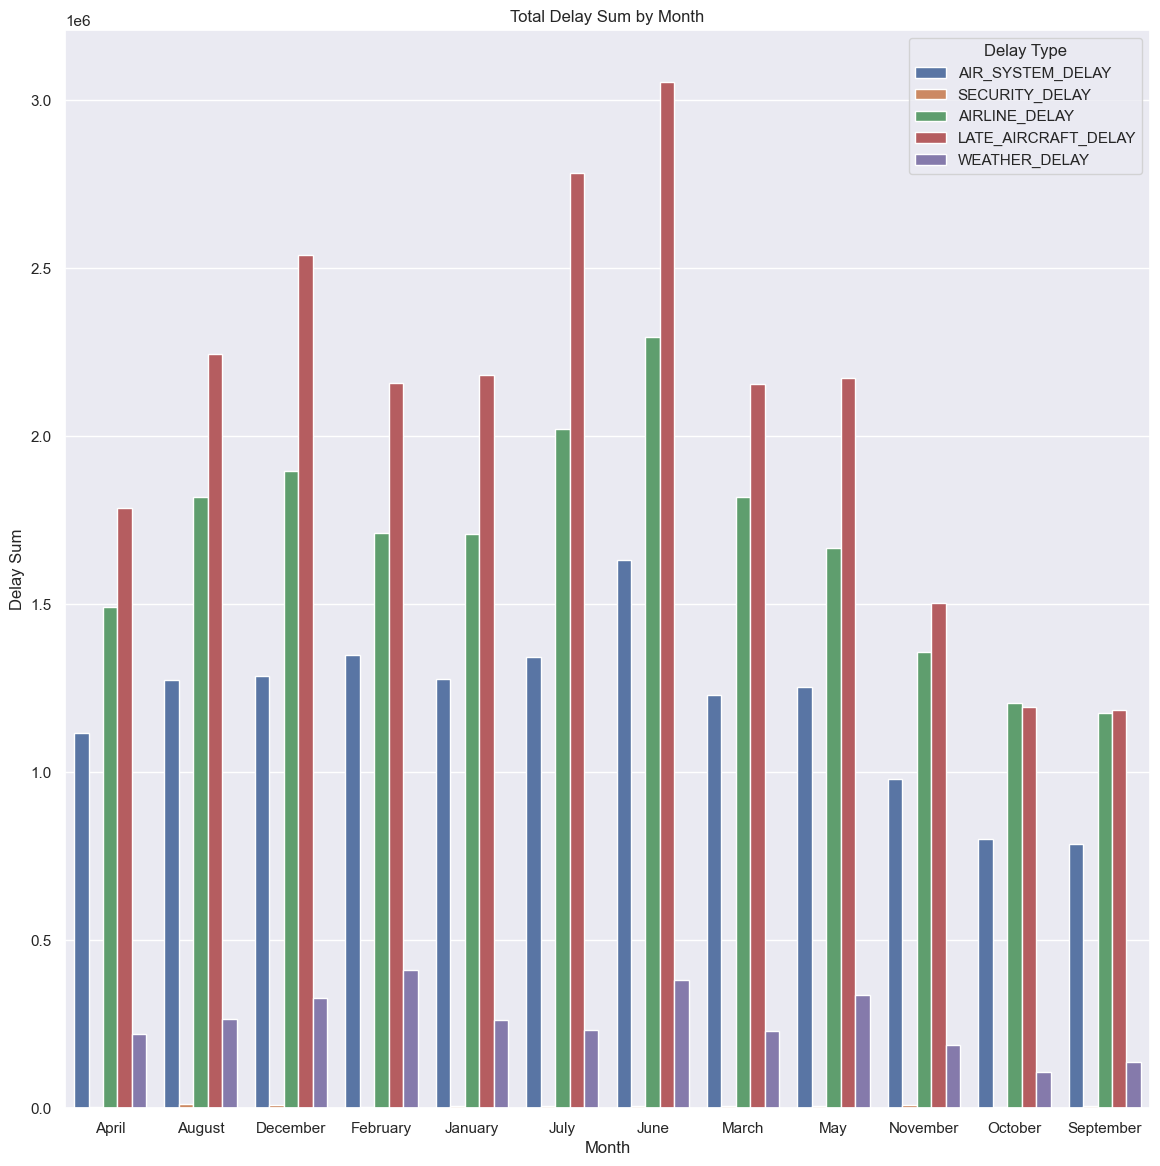

In [72]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# calculate the sum of delay values for each month
delay_sum = df.groupby('Month')[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum().reset_index()

# melt the data to create a long format for the delay types
delay_sum_melt = pd.melt(delay_sum, id_vars=['Month'], value_vars=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], var_name='Delay Type', value_name='Delay Sum')

# create a bar chart comparing the sum of different types of delays for each month
bar_chart = sns.barplot(x='Month', y='Delay Sum', hue='Delay Type', data=delay_sum_melt)

# set the legend position and title
plt.legend(loc='upper right', title='Delay Type')

# set the title and axis labels
plt.title('Total Delay Sum by Month')
plt.xlabel('Month')
plt.ylabel('Delay Sum')

# show the graph
plt.show()


In [225]:
# create an empty dataframe to store the counts
delay_counts = pd.DataFrame()

display(df.head())
print(df.shape)

# iterate over all the months
for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
    # select the rows for the current month
    month_df = df[df['Month'] == month]
    print(month_df.shape)
    
    month_df = month_df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].apply(np.count_nonzero)
    print(month_df)


,TAIL_NUMBER,SCHEDULED_DEPARTURE,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,...,airport_org_AIRPORT,airport_org_CITY,airport_org_COUNTRY,airport_des_AIRPORT,airport_des_CITY,airport_des_COUNTRY,AIRLINE_name,Date,Month,delay
0,N407AS,NaN,4,98,23:54:00,-11.0,20:05:00,169.0,1448,430,...,Ted Stevens Anchorage International Airport,Anchorage,USA,Seattle-Tacoma International Airport,Seattle,USA,Alaska Airlines Inc.,2015-01-01,January,False
1,N3KUAA,01:00:00,4,2336,NaN,-8.0,NaN,263.0,2330,750,...,Los Angeles International Airport,Los Angeles,USA,Palm Beach International Airport,West Palm Beach,USA,American Airlines Inc.,2015-01-01,January,False
2,N171US,02:00:00,4,840,01:08:00,-2.0,NaN,266.0,2296,806,...,San Francisco International Airport,San Francisco,USA,Charlotte Douglas International Airport,Charlotte,USA,US Airways Inc.,2015-01-01,January,False
3,N3HYAA,02:00:00,4,258,01:05:00,-5.0,NaN,258.0,2342,805,...,Los Angeles International Airport,Los Angeles,USA,Miami International Airport,Miami,USA,American Airlines Inc.,2015-01-01,January,False
4,N527AS,02:05:00,4,135,02:04:00,-1.0,23:05:00,199.0,1448,320,...,Seattle-Tacoma International Airport,Seattle,USA,Ted Stevens Anchorage International Airport,Anchorage,USA,Alaska Airlines Inc.,2015-01-01,January,False


(5819079, 30)
(469968, 30)
AIR_SYSTEM_DELAY       429272
SECURITY_DELAY         374304
AIRLINE_DELAY          424771
LATE_AIRCRAFT_DELAY    425073
WEATHER_DELAY          380400
dtype: int64
(429191, 30)
AIR_SYSTEM_DELAY       389004
SECURITY_DELAY         334233
AIRLINE_DELAY          384306
LATE_AIRCRAFT_DELAY    383557
WEATHER_DELAY          342952
dtype: int64
(504312, 30)
AIR_SYSTEM_DELAY       460745
SECURITY_DELAY         409142
AIRLINE_DELAY          462573
LATE_AIRCRAFT_DELAY    459138
WEATHER_DELAY          413370
dtype: int64
(485151, 30)
AIR_SYSTEM_DELAY       447972
SECURITY_DELAY         403080
AIRLINE_DELAY          445899
LATE_AIRCRAFT_DELAY    444685
WEATHER_DELAY          407882
dtype: int64
(496993, 30)
AIR_SYSTEM_DELAY       454088
SECURITY_DELAY         407606
AIRLINE_DELAY          453971
LATE_AIRCRAFT_DELAY    454252
WEATHER_DELAY          413607
dtype: int64
(503897, 30)
AIR_SYSTEM_DELAY       446717
SECURITY_DELAY         388469
AIRLINE_DELAY          451790
LAT

<Figure size 1400x1400 with 0 Axes>

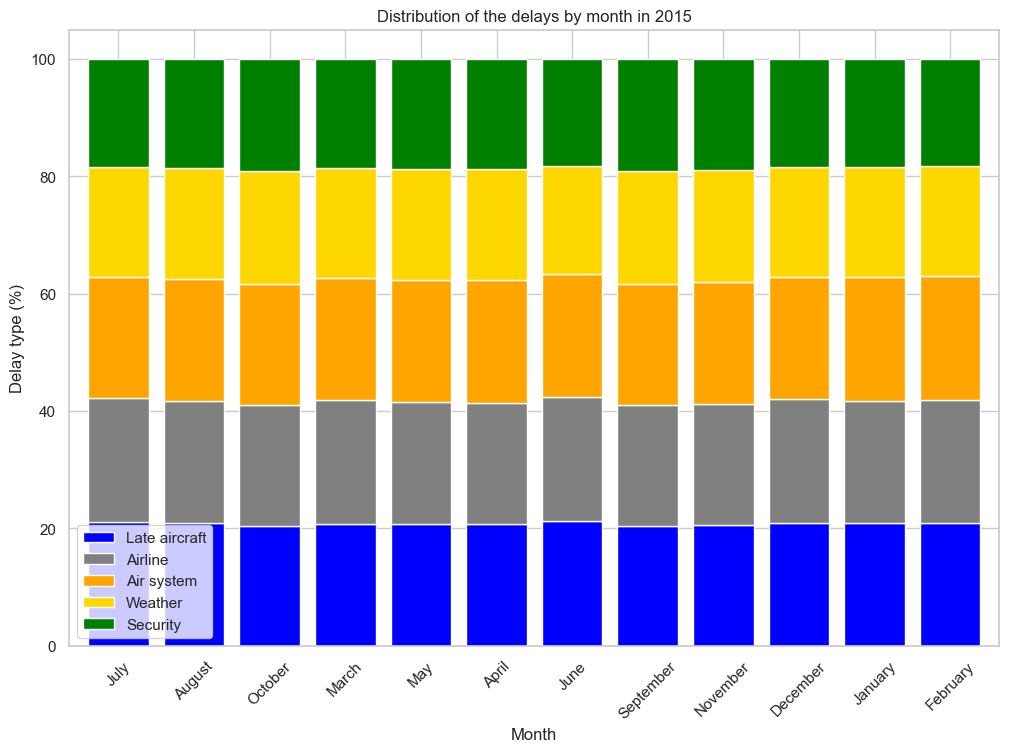

In [229]:
# create a new dataframe with the count of delays grouped by month
delay_df = df.groupby('Month')[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].agg(lambda x: x.astype(bool).sum())

# create a new column with the total delay
delay_df['Total Delay'] = delay_df.sum(axis=1)

# calculate the percentage of delay for each type of delay
for column in delay_df.columns:
    delay_df[column + ' (%)'] = delay_df[column] / delay_df['Total Delay'] * 100

# sort the values in the DataFrame by the total delay in descending order
delay_df = delay_df.sort_values(by='Total Delay', ascending=False)

# select the columns to plot
plot_cols = ['LATE_AIRCRAFT_DELAY (%)', 'AIRLINE_DELAY (%)', 'AIR_SYSTEM_DELAY (%)', 'WEATHER_DELAY (%)', 'SECURITY_DELAY (%)']
order = delay_df.index.tolist()

# set the figure size
plt.figure(figsize=(14, 14))

# plot the stacked bar chart
ax = delay_df[plot_cols].loc[order].plot(kind='bar', stacked=True, figsize=(12,8), width=0.8, 
                                         color=['blue', 'gray', 'orange', 'gold', 'green'])

# set the x-axis label
ax.set_xlabel('Month')

# set the y-axis label
ax.set_ylabel('Delay type (%)')

# set the title
ax.set_title('Distribution of the delays by month in 2015')

# add legend
ax.legend(['Late aircraft', 'Airline', 'Air system', 'Weather', 'Security'], loc='lower left')

plt.xticks(rotation=45)

# show the plot
plt.show()


<Figure size 1400x1400 with 0 Axes>

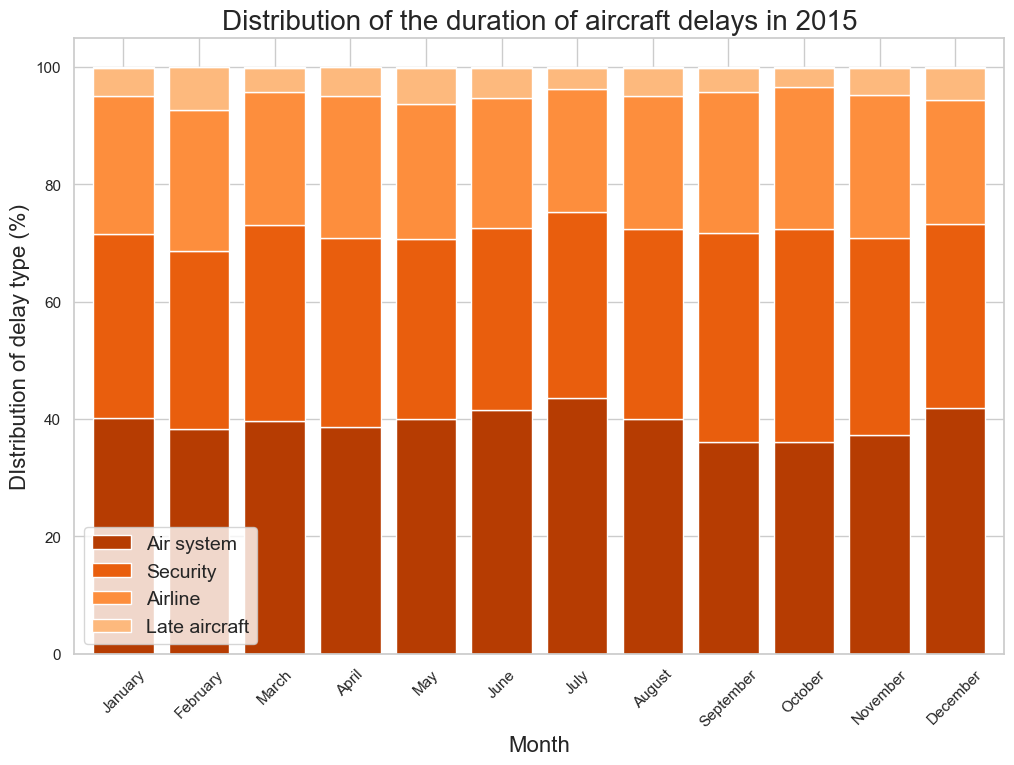

In [250]:
# create a new dataframe with the count of delays grouped by month
delay_df = df.groupby('Month')[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()

# create a new column with the total delay
delay_df['Total Delay'] = delay_df.sum(axis=1)

# calculate the percentage of delay for each type of delay
for column in delay_df.columns:
    delay_df[column + ' (%)'] = delay_df[column] / delay_df['Total Delay'] * 100

# sort the values in the DataFrame by the total delay in descending order
delay_df = delay_df.sort_values(by='Total Delay', ascending=False)

# select the columns to plot
plot_cols = ['LATE_AIRCRAFT_DELAY (%)', 'AIRLINE_DELAY (%)', 'AIR_SYSTEM_DELAY (%)', 'WEATHER_DELAY (%)', 'SECURITY_DELAY (%)']
order = delay_df.index.tolist()

# set the figure size
plt.figure(figsize=(14, 14))

# define custom order of month names
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# sort the values in the DataFrame by the order of months
delay_df = delay_df.loc[month_order]

# set color palette
colors = sns.color_palette('Oranges_r', n_colors=5)

# plot the stacked bar chart
ax = delay_df[plot_cols].plot(kind='bar', stacked=True, figsize=(12,8), width=0.8, color=colors)

# set the x-axis label
ax.set_xlabel('Month', fontsize=16)

# set the y-axis label
ax.set_ylabel('DIstribution of delay type (%)', fontsize=16)

# set the title
ax.set_title('Distribution of the duration of aircraft delays in 2015', fontsize=20)

# add legend
ax.legend(['Air system', 'Security', 'Airline', 'Late aircraft'], loc='lower left', fontsize=14)

plt.xticks(rotation=45)

# show the plot
plt.show()


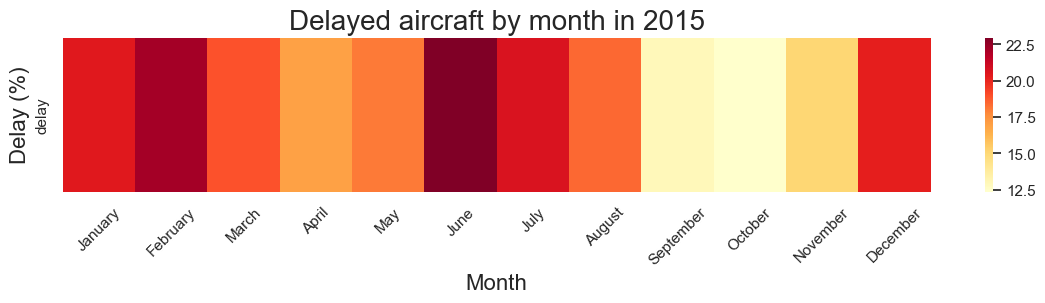

In [244]:
# define custom order of month names
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# select columns
df_heatmap = df[['delay', 'Month']]

# group by month and calculate the mean delay
df_heatmap = df_heatmap.groupby('Month')['delay'].mean()*100

# create pivot table with month names as rows and delay as columns
df_heatmap = pd.pivot_table(df_heatmap.reset_index(), index='Month', values='delay').T[month_order]

# set the figure size
plt.figure(figsize=(14, 2))

# create heatmap using seaborn
sns.heatmap(df_heatmap, cmap='YlOrRd')

# set title and axis labels with custom font sizes
plt.title('Delayed aircraft by month in 2015', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Delay (%)', fontsize=16)

plt.xticks(rotation=45)

# show the plot
plt.show()


C:\Users\trist\AppData\Local\Temp\ipykernel_14296\2319843480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['Date'] = pd.to_datetime(df_heatmap['Date'], format='%Y-%m-%d')


<Axes: xlabel='Date'>

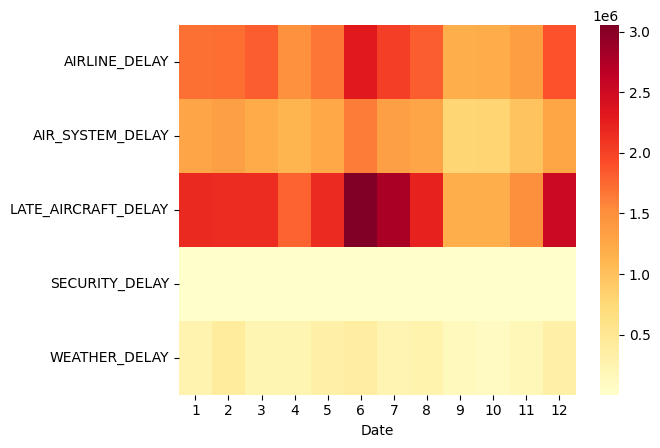

In [5]:
# select columns
df_heatmap = df[['AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'Date']]

df_heatmap['Date'] = pd.to_datetime(df_heatmap['Date'], format='%Y-%m-%d')

# group by month and calculate the total delay time for each reason of delay
df_heatmap = pd.pivot_table(df_heatmap, index=df_heatmap['Date'].dt.month, values=['AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], aggfunc=sum)

df_heatmap = df_heatmap.T 
# create heatmap using seaborn
sns.heatmap(df_heatmap, cmap='YlOrRd')


In [15]:
# Radar plot with the sum of delay and a heatmap for the delay of each month

# count non-null values for each column
counts = df[['AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].count()

print(counts)



AIRLINE_DELAY          1063439
WEATHER_DELAY          1063439
AIR_SYSTEM_DELAY       1063439
SECURITY_DELAY         1063439
LATE_AIRCRAFT_DELAY    1063439
dtype: int64


In [57]:
df_delay= df.dropna(subset=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], inplace=False)

In [58]:
print(df.shape)
print(df_delay.shape)

(5819079, 28)
(1063439, 28)


In [61]:
counts = df_delay[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].astype(bool).sum()
print(counts)


AIR_SYSTEM_DELAY       564826
SECURITY_DELAY           3484
AIRLINE_DELAY          570022
LATE_AIRCRAFT_DELAY    556953
WEATHER_DELAY           64716
dtype: int64


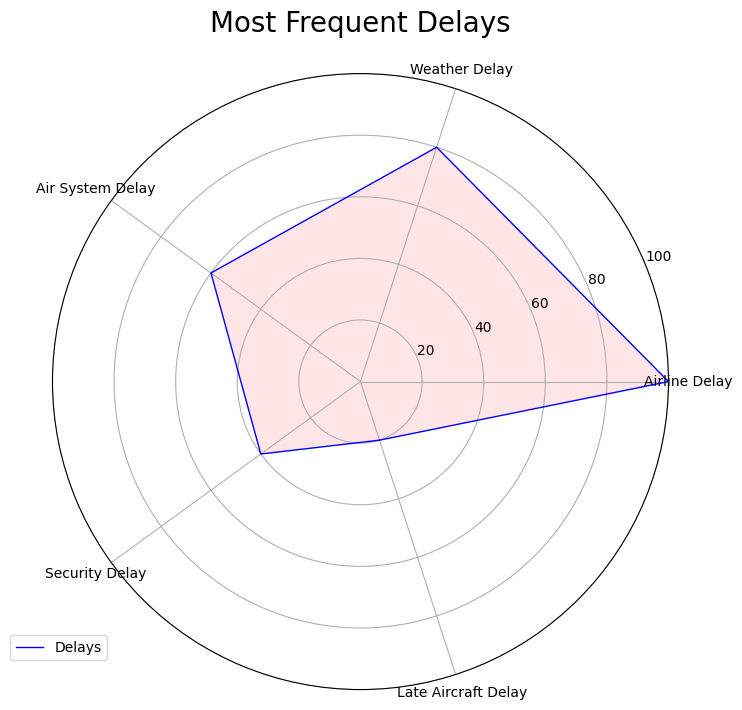

In [68]:
# Data
categories = ['AIRLINE_DELAY', 'WEATHER_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
values = [100, 80, 60, 40, 20]

# Create figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Set angles and labels
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
labels = [category.replace('_', ' ').title() for category in categories]
ax.set_thetagrids(angles * 180 / np.pi, labels)

# Set axis limits and ticks
ax.set_ylim(0, 100)
ax.set_rticks([20, 40, 60, 80, 100])

# Plot values
ax.plot(angles, values, linewidth=1, linestyle='solid', color='blue', label='Delays')
ax.fill(angles, values, 'red', alpha=0.1)

# Add a border between late aircraft delay and airline delay
idx1 = categories.index('LATE_AIRCRAFT_DELAY')
idx2 = categories.index('AIRLINE_DELAY')
value1 = values[idx1]
value2 = values[idx2]
ax.plot([angles[idx1], angles[idx2]], [value1, value2], color='blue', linewidth=1)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Set title
ax.set_title('Most Frequent Delays', fontsize=20, pad=30)

# Show plot
plt.show()


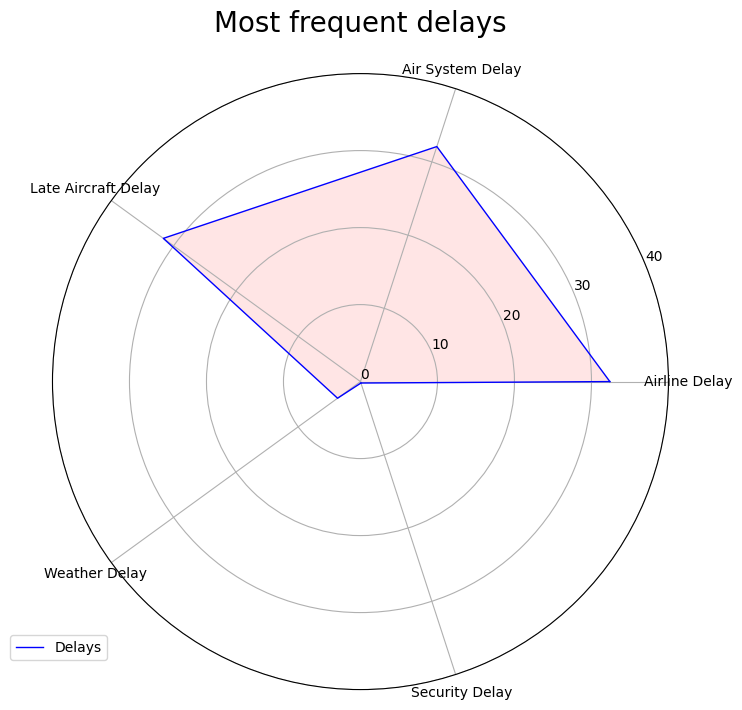

In [69]:
# Data

#AIRLINE_DELAY          570022
#AIR_SYSTEM_DELAY       564826
#LATE_AIRCRAFT_DELAY    556953
#WEATHER_DELAY           64716
#SECURITY_DELAY           3484

categories = ['AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'SECURITY_DELAY']
values = [570022, 564826, 556953, 64716, 3484]

# Calculate percentage
total = sum(values)
percentages = [value/total*100 for value in values]

# Create figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Set angles and labels
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
labels = [category.replace('_', ' ').title() for category in categories]
ax.set_thetagrids(angles * 180 / np.pi, labels)

# Set axis limits and ticks
ax.set_ylim(0, 40)
ax.set_rticks([0, 10, 20, 30, 40])

# Plot values
ax.plot(angles, percentages, linewidth=1, linestyle='solid', color='blue', label='Delays')
ax.fill(angles, percentages, 'red', alpha=0.1)

"""
# Add a border between late aircraft delay and airline delay
idx = categories.index('LATE_AIRCRAFT_DELAY')
value = percentages[idx]
ax.plot([angles[idx], angles[0]], [value, value], color='black', linewidth=1)
"""

# Add a border between late aircraft delay and airline delay
idx1 = categories.index('SECURITY_DELAY')
idx2 = categories.index('AIRLINE_DELAY')
value1 = percentages[idx1]
value2 = percentages[idx2]
ax.plot([angles[idx1], angles[idx2]], [value1, value2], color='blue', linewidth=1)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Set title
ax.set_title('Most frequent delays', fontsize=20, pad=30)

# Show plot
plt.show()